# Algorytmy tekstowe - laboratorium 1

# 1. Zaimplementuj w Pythonie algorytmy wyszukiwania wzorców:
<ul>
    <li>naiwny</li>
    <li>automat skończony </li>
    <li>algorytm KMP </li>
</ul>

# Algorytm naiwny:

In [15]:
def naive(text, pattern): # O(nm - m^2 + m)
    result = []
    for s in range(len(text)-len(pattern)+1):
        if text[s:s+len(pattern)] == pattern:
            result.append(s)
    return result

# Automat skończony:

preprocessing

In [16]:
def transition(pattern):
    letters = set(pattern)
    result = []
    for q in range(0, len(pattern) + 1):
        result.append({})
        for letter in letters:
            k = min(len(pattern)+1, q+2)
            while True:
                k -= 1
                if k == 0 or pattern[:k] == (pattern[:q] + letter)[-k:]:
                    break
            result[q][letter] = k

    return result

bez preprocessingu:

In [17]:
def fa_matching_without_preprocessing(text, pattern, delta):
    q = 0
    length = len(delta) - 1
    result = []

    for i in range(0, len(text)):
        if text[i] in delta[q]:
            q = delta[q][text[i]]
            if (q == length):
                result.append(i+1-q)
        else:
            q = 0
            
    return result

z preprocessingiem:

In [18]:
def fa_matching(text, pattern):
    q = 0
    delta = transition(pattern)
    length = len(delta) - 1
    result = []

    for i in range(0, len(text)):
        if text[i] in delta[q]:
            q = delta[q][text[i]]
            if (q == length):
                result.append(i+1-q)
        else:
            q = 0
            
    return result

# Algorytm Knutha-Morrisa-Pratta:

preprocessing:

In [19]:
def prefix_function(pattern):
    pi = [0]
    k = 0
    for q in range(1,len(pattern)):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k-1]
        if pattern[k] == pattern[q]:
            k += 1
        pi.append(k)
    return pi
    

bez preprocessingu:

In [20]:
def KMP_without_preprocessing(text, pattern, pi):
    q = 0
    result = []
    
    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]
        if pattern[q] == text[i]:
            q += 1
        if q == len(pattern):
            q = pi[q-1]
            result.append(i+1-q)
    return result

z preprocessingiem:

In [21]:
def KMP(text, pattern):
    pi = prefix_function(pattern)
    q = 0
    result = []
    
    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]
        if pattern[q] == text[i]:
            q += 1
        if q == len(pattern):
            q = pi[q-1]
            result.append(i+1-q)
    return result

# 2. Zaimplementuj testy porównujące szybkość działania wyżej wymienionych algorytmów, z rozbiciem na czas pre-processingu oraz czas wyszukiwania wzorca w tekście

In [22]:
import time

def check_time(algorithm, algorith_without_preprocessing ,text, pattern, flag, function_id):
    preprocessing_time, function_time = 0, 0
 
    if function_id != "Algorytm naiwny":
        start_preprocessing = time.time()
        data = algorithm(pattern)
        end_preprocessing = time.time()
    
        start_function = time.time()
        algorith_without_preprocessing(text, pattern, data)
        end_function = time.time()
    else:
        start_preprocessing = time.time()
        result = []
        end_preprocessing = time.time()
        
        start_function = time.time()
        algorith_without_preprocessing(text, pattern)
        end_function = time.time()
        
    preprocessing_time = end_preprocessing - start_preprocessing
    function_time = end_function - start_function
    
    if flag:
        print("\nFunkcja: " + function_id)
        print(f"Czas preprocessingu: {preprocessing_time}")
        print(f"Czas wyszukiwania wzorca: {function_time}")  
        print(f"Sumaryczny czas: {preprocessing_time + function_time}")
    else:
        return preprocessing_time, function_time

testy:

In [23]:
text =  "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyzqwertyuiopasdfghjklzxcvbnmsdfghjklamnasmnrt"*3
pattern = "mnop" 

check_time(naive, naive, text, pattern, True, "Algorytm naiwny")
check_time(transition, fa_matching_without_preprocessing, text, pattern, True, "Automat skończony")
check_time(prefix_function, KMP_without_preprocessing, text, pattern, True, "Algorytm Knutha-Morrisa-Pratta")


Funkcja: Algorytm naiwny
Czas preprocessingu: 0.0
Czas wyszukiwania wzorca: 0.00012612342834472656
Sumaryczny czas: 0.00012612342834472656

Funkcja: Automat skończony
Czas preprocessingu: 5.507469177246094e-05
Czas wyszukiwania wzorca: 5.984306335449219e-05
Sumaryczny czas: 0.00011491775512695312

Funkcja: Algorytm Knutha-Morrisa-Pratta
Czas preprocessingu: 4.76837158203125e-06
Czas wyszukiwania wzorca: 8.797645568847656e-05
Sumaryczny czas: 9.274482727050781e-05


# 3. Znajdź wszystkie wystąpienia wzorców "pan" oraz "pani" w załączonym pliku, za pomocą każdego algorytmu. W raporcie zamieść liczbę dopasowań każdego ze wzorców osobno dla każdego algorytmu. Upewnij się, że każdy algorytm zwraca taką samą liczbę dopasowań

In [24]:
def find_pattern(file, pattern):
    result1, result2, result3 = None, None, None
    
    with open(file, "r") as file:
        
        text = file.read()
        
        result1 = naive(text,pattern)
        print(f"Algorytm naiwny - liczba dopasowań: {len(result1)}")
        result2 = fa_matching(text, pattern)
        print(f"Automat skończony - liczba dopasowań: {len(result2)}")
        result3 = KMP(text, pattern)
        print(f"Algorytm Knutha-Morrisa-Pratta - liczba dopasowań: {len(result3)}")
        
    if len(result1) == len(result2) and len(result2) == len(result3):
        print(f"\nWszystkie algorytmy zwróciły taką samą liczbę dopasowań: {len(result1)}")
    else:
        print("Liczba dopasowań jest różna dla algorytmów.")
        

In [25]:
print("---------- Wzorzec 'pan' ----------")
find_pattern("pan-tadeusz.txt", "pan")
print("\n---------- Wzorzec 'pani' ----------")
find_pattern("pan-tadeusz.txt", "pani")

---------- Wzorzec 'pan' ----------
Algorytm naiwny - liczba dopasowań: 401
Automat skończony - liczba dopasowań: 401
Algorytm Knutha-Morrisa-Pratta - liczba dopasowań: 401

Wszystkie algorytmy zwróciły taką samą liczbę dopasowań: 401

---------- Wzorzec 'pani' ----------
Algorytm naiwny - liczba dopasowań: 100
Automat skończony - liczba dopasowań: 100
Algorytm Knutha-Morrisa-Pratta - liczba dopasowań: 100

Wszystkie algorytmy zwróciły taką samą liczbę dopasowań: 100


# 4. Porównaj szybkość działania algorytmów dla problemu z p. 3, z uwzględnieniem czasu pre-processingu oraz czasu dopasowania. Pomiar czasu powinien być przeprowadzony co najmniej 5-krotnie i przedstawione w formie tabeli oraz wykresu, uwzględniającego czas minimalny, maksymalny oraz średni czas 

In [26]:
import pandas as pd

df = pd.DataFrame()
preprocessing_tab, function, algo_type, total = [], [], [], []


for algorithm, preprocessing, function_id in [(naive, naive, "Algorytm naiwny"), (fa_matching_without_preprocessing, transition, "Automat skończony"), (KMP_without_preprocessing, prefix_function, "Algorytm Knutha-Morrisa-Pratta")]:
    for _ in range(5):
            
        preprocessing_time1, function_time1 = check_time(preprocessing,algorithm, text, "pan", False, function_id)
        preprocessing_time2, function_time2 = check_time(preprocessing,algorithm, text, "pani", False, function_id)
        preprocessing_tab.append(preprocessing_time1 + preprocessing_time2)
        function.append(function_time1 + function_time2)
        total.append(preprocessing_time1 + preprocessing_time2 + function_time1 + function_time2)
        algo_type.append(function_id)
            
df['Algorytm'] = algo_type
df['Czas preprocessingu'] = preprocessing_tab
df['Czas wyszukiwania wzorca'] = function
df['Czas rzeczywisty'] = total

df

,Algorytm,Czas preprocessingu,Czas wyszukiwania wzorca,Czas rzeczywisty
0,Algorytm naiwny,1.907349e-06,0.000561,0.000563
1,Algorytm naiwny,9.536743e-07,0.000177,0.000178
2,Algorytm naiwny,9.536743e-07,0.000177,0.000178
3,Algorytm naiwny,1.907349e-06,0.000176,0.000178
4,Algorytm naiwny,0.000000e+00,0.000176,0.000176
5,Automat skończony,7.867813e-05,0.000112,0.000191
6,Automat skończony,6.628036e-05,0.000104,0.000170
7,Automat skończony,5.674362e-05,0.000113,0.000170
8,Automat skończony,8.416176e-05,0.000086,0.000170
9,Automat skończony,5.388260e-05,0.000080,0.000134


# Wykres:

<AxesSubplot:xlabel='name'>

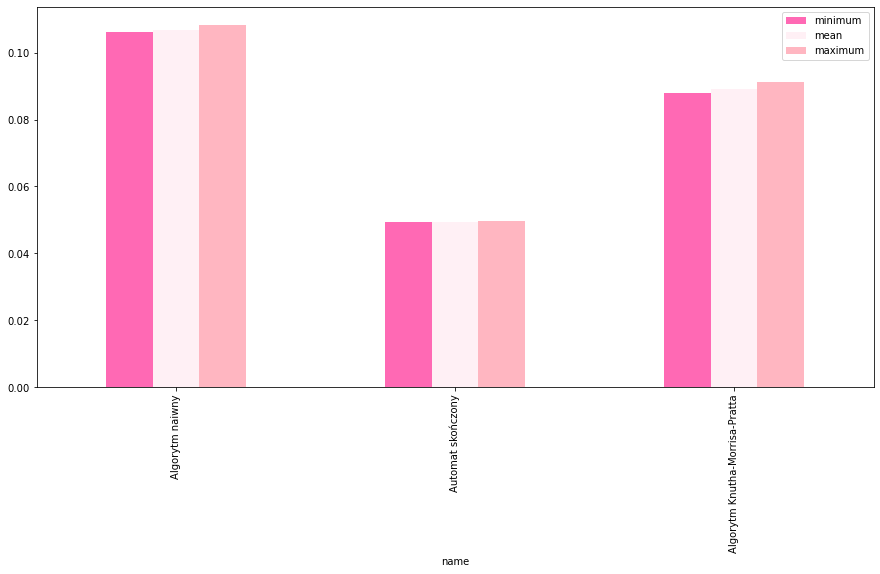

In [13]:
from statistics import mean

d = pd.DataFrame()
min_, max_, avg_, algorithm = [], [], [], []

def add_data(start_idx, end_idx, name):
    min_.append(min(total[start_idx:end_idx]))
    max_.append(max(total[start_idx:end_idx]))
    avg_.append(mean(total[start_idx:end_idx]))
    algorithm.append(name)
    
add_data(0,5,"Algorytm naiwny")
add_data(5, 10, "Automat skończony")
add_data(10,15,"Algorytm Knutha-Morrisa-Pratta")
    

d['minimum'] = min_
d['maximum'] = max_
d['mean'] = avg_
d['name'] = algorithm
    
d.plot(x="name", y=["minimum", "mean", "maximum"], kind = "bar", 
       color=["hotpink","LavenderBlush","LightPink"], figsize =(15,7))

# 5. Zaproponuj tekst oraz wzorzec, dla którego zmierzony czas działania algorytmów 2 oraz 3 (uwzględniający tylko dopasowanie, bez pre-processingu) będzie co najmniej 5-krotnie krótszy niż dla algorytmu naiwnego. Uruchom każdy algorytm na zadanym wzorcu i tekście, w celu sprawdzenia, czy zmierzony czas jest faktycznie co najmniej 5-krotnie krótszy

In [14]:
text = "aaaa" * 1000000
pattern = "a" * 100000

naive_method = check_time(naive, naive, text, pattern, False, "Algorytm naiwny")[1]
fa_method = check_time(transition, fa_matching_without_preprocessing, text, pattern, False, "Automat skończony")[1]
kmp_method = check_time(prefix_function, KMP_without_preprocessing,text, pattern, False, "Algorytm Knutha-Morrisa-Pratta")[1]

print(f"Algorytm naiwny: {naive_method}")
print(f"Automat skończony: {fa_method}")
print(f"Algorytm Knutha-Morrisa-Pratta: {kmp_method}")

answer = naive_method >= 5*fa_method and naive_method >= 5*kmp_method
print(f"Czy algorytm naiwny dla tego przypadku jest co najmniej 5 razy wolniejszy? {answer}")


Algorytm naiwny: 47.300759077072144
Automat skończony: 1.601790428161621
Algorytm Knutha-Morrisa-Pratta: 2.4514551162719727
Czy algorytm naiwny dla tego przypadku jest co najmniej 5 razy wolniejszy? True


# 6. Przedstaw wnioski wynikające z przeprowadzonych eksperymentów, ze szczególnym uwzględnieniem praktycznych konsekwencji wynikających z różnic pomiędzy zaimplementowanymi algorytmami

<ul> 
    <li> Algorytmy zwracają dla podpunktu trzeciego tę samą liczbę znalezionych dopasowań, tak więc powyższe implementacje algorytmów wyszukiwania wzorca wydają się działać poprawnie.</li>
    <li> Każdy z zaimplementownych algorytmów ma swoje wady i zalety, a ich wydajność zależy od charakterystyki wzorca i tekstu oraz wymagań dotyczących czasu i pamięci. </li>
    <li> Wyniki pomiarów przedstawione w formie tabeli sugerują, że algorytm naiwny jest najwolniejszy, a algorytm automatu skończonego jest najszybszy. Algorytm Knutha-Morrisa-Pratta jest znacznie szybszy niż algorytm naiwny, ale trochę wolniejszy (w tym przypadku) niż algorytm automatu skończonego. Jest to zgodne z teoretyczną złożonością obliczeniową wszystkich trzech algorytmów.</li>
    <li> W niektórych przypadkach, zwłaszcza gdy wzorzec jest długi i zawiera powtarzające się podciągi, algorytm automatu skończonego może działać szybciej niż algorytm KMP. Dzieje się tak, ponieważ automat skończony wymaga mniej porównań znaków niż algorytm KMP, co wpływa na szybkość działania. Jednak w innych przypadkach, gdy wzorzec jest krótszy i nie zawiera powtarzających się podciągów, algorytm KMP może być szybszy niż automat skończony, ponieważ ma mniejszą złożoność czasową i pamięciową.</li>
    <li> Dla powtarzających się wzorców i tekstów (takich jak ten zaprezentowany w podpunkcie 5),  automat skończony i algorytm KMP osiągają znacznie lepszą wydajność niż algorytm naiwny. Dzieje się tak, ponieważ algorytm naiwny sprawdza każdą pozycję w tekście, zaczynając od początku i porównując wzorzec z podciągami tekstu na każdej pozycji. W przeciwieństwie do tego, automat skończony i algorytm KMP wykorzystują wcześniejsze porównania, aby uniknąć porównywania tych samych podciągów tekstu wielokrotnie, co pozwala zaoszczędzić czas.</li>
    <li> Najdłuższy czas preprocessingu ma algorytm wykorzystujący automat skończony. Warto zauważyć, że jego złożoność pamięciowa zależy także od ilości znaków w alfabecie, a złożoność algorytmu KMP zależy tylko od długości wzorca. Algorytm naiwny wypada najkorzystniej ze względu na złożoność pamięciową.</li>
</ul>